In [1]:
import os
import numpy as np
from tqdm import tqdm
#from operator import itemgetter
#from collections import OrderedDict

from PIL import Image
#import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import optim,nn
import torch.nn.functional as F
from torchvision import transforms as T,models
from torch.utils.data import Dataset, DataLoader, random_split
#from torchvision.utils import make_grid

#pd.options.plotting.backend = "plotly"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import numpy as np
import pickle
import torch

In [2]:
mydict = np.load("all_concat_data.npz")
X_jul_trn, y_jul_trn = mydict['X_jul_trn'], mydict['y_jul_trn']
X_jul_aug_trn, y_jul_aug_trn = mydict['X_jul_aug_trn'], mydict['y_jul_aug_trn']
X_jul_aug_val, y_jul_aug_val = mydict['X_jul_aug_val'], mydict['y_jul_aug_val']
X_jul_aug_sep_trn, y_jul_aug_sep_trn = mydict['X_jul_aug_sep_trn'], mydict['y_jul_aug_sep_trn']
X_jul_aug_sep_val, y_jul_aug_sep_val = mydict['X_jul_aug_sep_val'], mydict['y_jul_aug_sep_val']

In [4]:
import numpy as np
import torch
from base_evaluator import KNNEvaluator, CKNNEvaluator, LavaEvaluator_geomloss
from base_evaluator import LavaEvaluator_OT, ExperimentRunner
from base_evaluator import LavaEvaluator_batch, LavaEvaluator_batchl2l
from experiment_run import run_experiments
from machine_learning_model import LogisticRegression

In [3]:
import numpy as np
import torch
from base_evaluator import KNNEvaluator, CKNNEvaluator, LavaEvaluator_geomloss
from base_evaluator import LavaEvaluator_OT, ExperimentRunner
from base_evaluator import LavaEvaluator_batch, LavaEvaluator_batchl2l
from experiment_run import run_experiments
from machine_learning_model import LogisticRegression

# Giả sử bạn đã load dữ liệu từ all_concat_data.npz
#   X_jul_trn, y_jul_trn
#   X_jul_aug_trn, y_jul_aug_trn
#   X_jul_aug_val, y_jul_aug_val
# ...

num_jul = len(X_jul_trn)  # số mẫu train tháng 7
num_aug = len(X_jul_aug_trn) - num_jul  # số mẫu train tháng 8

print("Số mẫu tháng 7 (train):", num_jul)
print("Số mẫu tháng 8 (train):", num_aug)
print("Tổng (tháng 7+8):", len(X_jul_aug_trn))

# Khởi tạo evaluator
knn_evaluator1 = KNNEvaluator(Ismetric=0)
cknn_evaluator2 = CKNNEvaluator(T=200, default=False)
lava_evaluator_batch1 = LavaEvaluator_batch(batch=56)
lava_evaluator_batchl2l = LavaEvaluator_batchl2l(batch=56)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()

experiment = ExperimentRunner(evaluators=[
    knn_evaluator1, 
    cknn_evaluator2, 
    lava_evaluator_batch1,
    lava_evaluator_batchl2l,
    lava_evaluator_OT, 
    lava_evaluator_geomloss
])

# Chạy evaluator trên train (tháng 7+8) -> để lấy shap/data values
results = experiment.run(
    X_jul_aug_trn, 
    y_jul_aug_trn, 
    X_jul_aug_val,  # val
    y_jul_aug_val
)

# 'results' là dict: 
#   {
#       'knn': array([...]),
#       'tknn': array([...]),
#       'lava_batch': array([...]),
#       ... 
#   }
# Mỗi mảng có độ dài = len(X_jul_aug_trn) (tức là tháng 7+8)


Số mẫu tháng 7 (train): 523
Số mẫu tháng 8 (train): 455
Tổng (tháng 7+8): 978
Running evaluator: KNNEvaluator0


100%|██████████| 977/977 [00:00<00:00, 3284.70it/s]


KNNEvaluator0 completed in 0.57 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 778/778 [00:00<00:00, 3426.96it/s]


CKNNEvaluator1 completed in 0.38 seconds.
Running evaluator: LavaEvaluator_batch2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]





d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(










































batch LAVA:   6%|▌         | 1/18 [00:01<00:18,  1.06s/it]















































batch LAVA:  11%|█         | 2/18 [00:01<00:14,  1.12it/s]















































batch LAVA:  17%|█▋        | 3/18 [00:02<00:12,  1.16it/s]















































batch LAVA:  22%|██▏       | 4/18 [00:03<00:11,  1.20it/s]















































batch LAVA:  28%|██▊       | 5/18 [00:04<00:10,  1.21it/s]















































batch LAVA:  33%|███▎      | 6/18 [00:04<00:08,  1.37it/s]















































batch LAVA:  39%|███▉      | 7/18 [00

LavaEvaluator_batch2 completed in 15.49 seconds.
Running evaluator: LavaEvaluator_batchl2l3


batch LAVA: 100%|██████████| 18/18 [00:08<00:00,  2.11it/s]


LavaEvaluator_batchl2l3 completed in 8.84 seconds.
Running evaluator: LavaEvaluator_OT4


LavaEvaluator_OT4 completed in 0.35 seconds.
Running evaluator: LavaEvaluator_geomloss5


LavaEvaluator_geomloss5 completed in 0.07 seconds.


In [4]:
shap_vals_algo_lst = list(results.keys())  # Ví dụ: ['knn', 'tknn', 'lava_batch', ...]

shap_vals_for_aug = {}
for algo in shap_vals_algo_lst:
    shap_all = results[algo]  # mảng shap cho toàn train (7+8)
    shap_aug = shap_all[num_jul : num_jul + num_aug]  # chỉ tách phần tháng 8
    shap_vals_for_aug[algo] = shap_aug


In [5]:
def data_experiment_add_aug(
    shap_vals_aug, 
    X_jul_trn, y_jul_trn, 
    X_aug_trn, y_aug_trn, 
    X_val, y_val,  # val = tháng 7+8
    model, 
    metrics='acc', 
    plot_every_percentage=0.01,
    add_high=True
):
    """
    Thêm dần dữ liệu tháng 8 vào tháng 7 dựa trên shap_vals_aug (độ dài = len(X_aug_trn)).
    """
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, roc_auc_score

    # Nếu add_high=True thì sắp xếp giảm dần => shap cao trước
    # Nếu add_high=False => sắp xếp tăng dần => shap thấp trước
    sorted_indices = np.argsort(shap_vals_aug)
    if add_high:
        sorted_indices = sorted_indices[::-1]  # giảm dần
    
    num_aug = len(X_aug_trn)
    steps = range(0, num_aug+1, max(1, round(num_aug*plot_every_percentage)))
    
    frac_data = []
    scores = []

    # Chuyển sang Tensor cho val
    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    for i in steps:
        frac = round(i / num_aug, 2)*100
        frac_data.append(frac)

        # Lấy i điểm "cao nhất" (hoặc "thấp nhất") theo shap
        selected_idx_aug = sorted_indices[:i]

        # Gộp tháng 7 + i điểm tháng 8
        X_tmp = np.concatenate((X_jul_trn, X_aug_trn[selected_idx_aug]), axis=0)
        y_tmp = np.concatenate((y_jul_trn, y_aug_trn[selected_idx_aug]), axis=0)

        # Chuyển sang Tensor
        X_tmp_t = torch.tensor(X_tmp, dtype=torch.float32)
        y_tmp_t = torch.tensor(y_tmp, dtype=torch.long)

        # Train
        model_clone = model.clone()
        model_clone.fit(X_tmp_t, y_tmp_t, epochs=1000, lr=0.1)

        # Predict
        preds = model_clone.predict(X_val_t)
        if metrics == 'acc':
            score = accuracy_score(y_val, preds)
        else:
            score = roc_auc_score(y_val, preds)
        scores.append(score)

    # Vẽ kết quả
    plt.plot(frac_data, scores, marker='o', label='Thêm dần dữ liệu tháng 8')
    plt.xlabel('% dữ liệu tháng 8 được thêm')
    plt.ylabel(metrics)
    plt.legend()
    plt.show()

    return frac_data, scores


---- Thử thêm dần tháng 8 theo KNNEvaluator0 ----


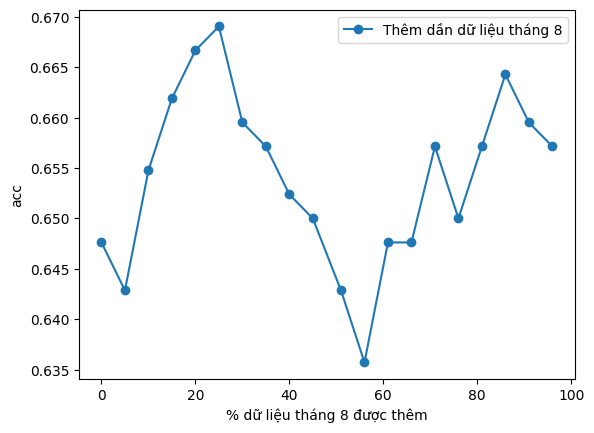

---- Thử thêm dần tháng 8 theo CKNNEvaluator1 ----


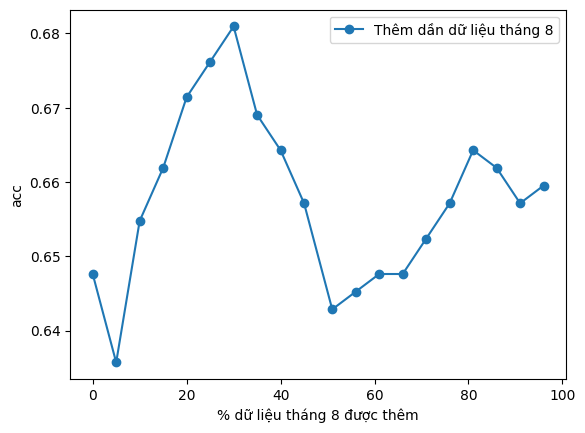

---- Thử thêm dần tháng 8 theo LavaEvaluator_batch2 ----


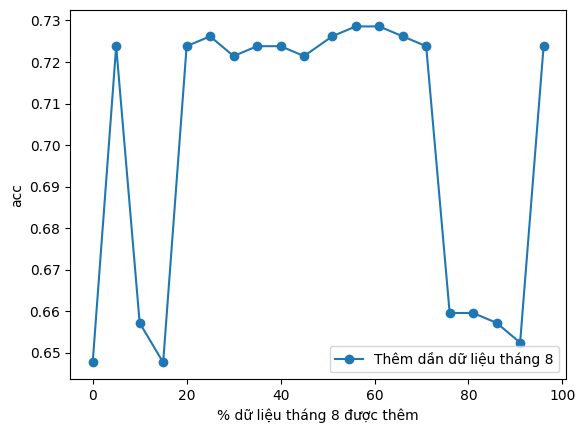

---- Thử thêm dần tháng 8 theo LavaEvaluator_batchl2l3 ----


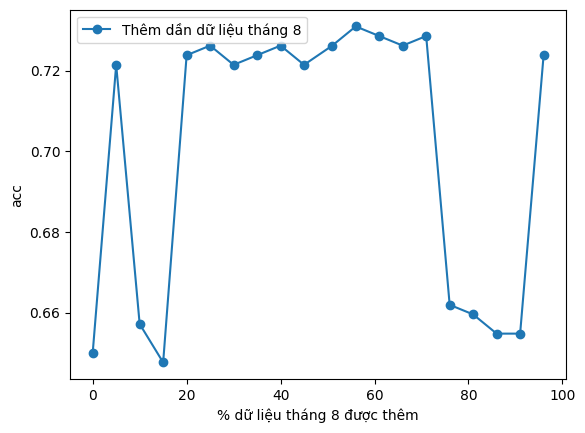

---- Thử thêm dần tháng 8 theo LavaEvaluator_OT4 ----


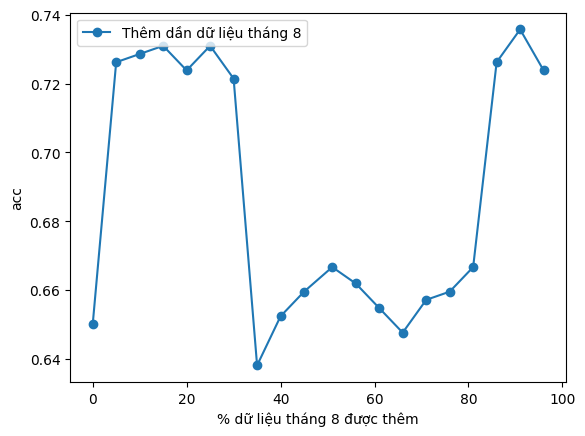

---- Thử thêm dần tháng 8 theo LavaEvaluator_geomloss5 ----


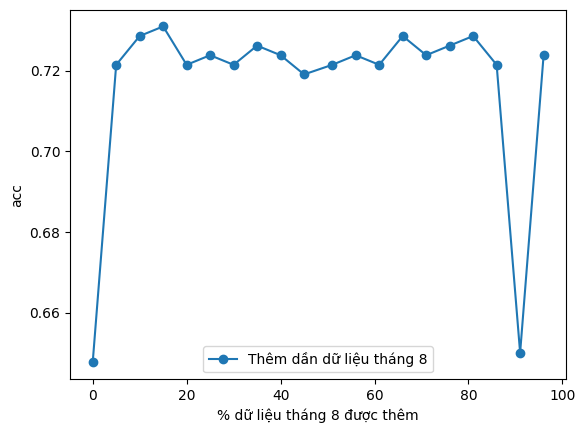

In [6]:
model = LogisticRegression(
    input_dim = X_jul_trn.shape[1],
    num_classes = len(np.unique(y_jul_trn))
)

for algo_name, shap_aug in shap_vals_for_aug.items():
    print(f"---- Thử thêm dần tháng 8 theo {algo_name} ----")
    frac_data, scores = data_experiment_add_aug(
        shap_vals_aug=shap_aug,
        X_jul_trn=X_jul_trn, y_jul_trn=y_jul_trn,
        X_aug_trn=X_jul_aug_trn[num_jul:],  # tách phần tháng 8
        y_aug_trn=y_jul_aug_trn[num_jul:],
        X_val=X_jul_aug_val, y_val=y_jul_aug_val,
        model=model,
        metrics='acc',
        plot_every_percentage=0.05,  # tùy ý
        add_high=True               # thêm từ shap cao
    )
    # Xem kết quả scores theo từng % dữ liệu tháng 8


Running evaluator: KNNEvaluator0


100%|██████████| 977/977 [00:00<00:00, 3724.66it/s]


KNNEvaluator0 completed in 0.55 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 778/778 [00:00<00:00, 3694.26it/s]


CKNNEvaluator1 completed in 0.33 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]                     d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA: 100%|██████████| 18/18 [00:08<00:00,  2.08it/s]


LavaEvaluator_batchl2l2 completed in 8.89 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.45 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.08 seconds.
[KNNEvaluator0] -> top25% tháng 8 = 113 điểm, index=[318 105 167 271 166] ...
[CKNNEvaluator1] -> top25% tháng 8 = 113 điểm, index=[318 105 167 271 166] ...
[LavaEvaluator_batchl2l2] -> top25% tháng 8 = 113 điểm, index=[65 88 81 49 19] ...
[LavaEvaluator_OT3] -> top25% tháng 8 = 113 điểm, index=[325 307 235 439 162] ...
[LavaEvaluator_geomloss4] -> top25% tháng 8 = 113 điểm, index=[439 326 216 325 291] ...

----- Đã chọn 25% tháng 8 cho MỌI evaluator -----


=== THỰC NGHIỆM 2 - EVALUATOR = KNNEvaluator0 ===
-> (7 + 25%8) size = (636, 27)
Running evaluator: KNNEvaluator0


100%|██████████| 969/969 [00:00<00:00, 3202.20it/s]


KNNEvaluator0 completed in 0.45 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 770/770 [00:00<00:00, 3085.62it/s]


CKNNEvaluator1 completed in 0.43 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA: 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


LavaEvaluator_batchl2l2 completed in 12.48 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.47 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.05 seconds.
-> Tháng 9 size=(334, 27), shap_sep=(334,)


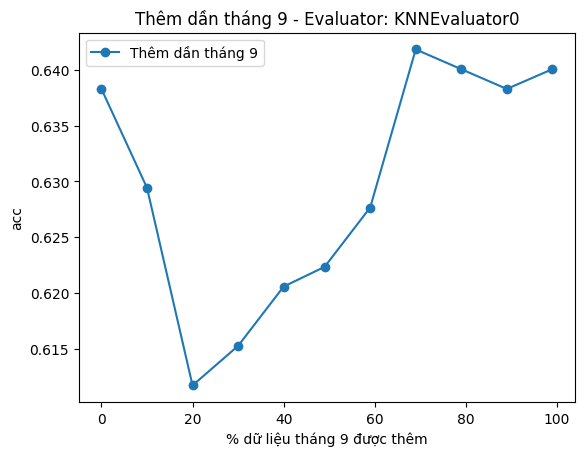


=== THỰC NGHIỆM 2 - EVALUATOR = CKNNEvaluator1 ===
-> (7 + 25%8) size = (636, 27)
Running evaluator: KNNEvaluator0


100%|██████████| 969/969 [00:00<00:00, 2247.42it/s]


KNNEvaluator0 completed in 0.65 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 770/770 [00:00<00:00, 2075.84it/s]


CKNNEvaluator1 completed in 0.61 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]                     d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]


LavaEvaluator_batchl2l2 completed in 14.88 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.51 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.09 seconds.
-> Tháng 9 size=(334, 27), shap_sep=(334,)


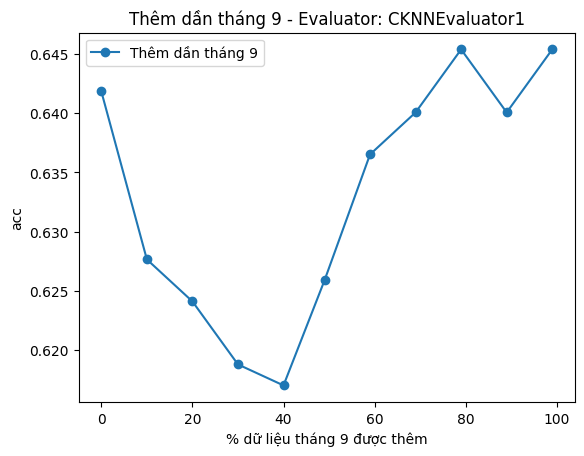


=== THỰC NGHIỆM 2 - EVALUATOR = LavaEvaluator_batchl2l2 ===
-> (7 + 25%8) size = (636, 27)
Running evaluator: KNNEvaluator0


100%|██████████| 969/969 [00:00<00:00, 2901.88it/s]


KNNEvaluator0 completed in 0.53 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 770/770 [00:00<00:00, 2515.01it/s]


CKNNEvaluator1 completed in 0.54 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]                     d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA: 100%|██████████| 18/18 [00:13<00:00,  1.33it/s]


LavaEvaluator_batchl2l2 completed in 13.92 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.57 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.06 seconds.
-> Tháng 9 size=(334, 27), shap_sep=(334,)


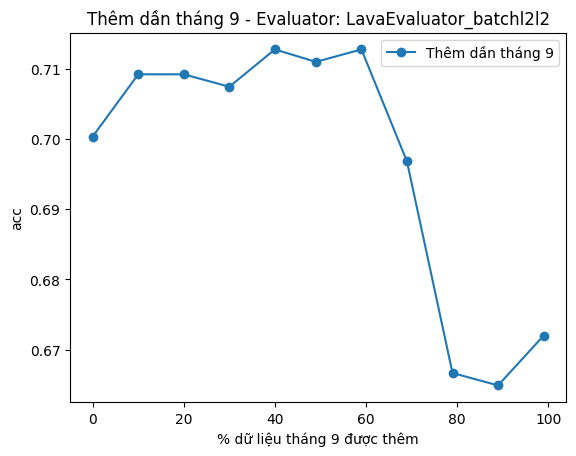


=== THỰC NGHIỆM 2 - EVALUATOR = LavaEvaluator_OT3 ===
-> (7 + 25%8) size = (636, 27)
Running evaluator: KNNEvaluator0


100%|██████████| 969/969 [00:00<00:00, 2775.36it/s]


KNNEvaluator0 completed in 0.53 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 770/770 [00:00<00:00, 2720.31it/s]


CKNNEvaluator1 completed in 0.48 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]                     d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA: 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]


LavaEvaluator_batchl2l2 completed in 14.29 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.44 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.05 seconds.
-> Tháng 9 size=(334, 27), shap_sep=(334,)


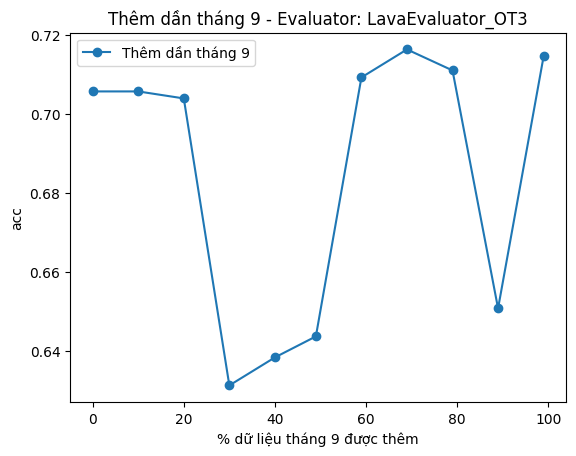


=== THỰC NGHIỆM 2 - EVALUATOR = LavaEvaluator_geomloss4 ===
-> (7 + 25%8) size = (636, 27)
Running evaluator: KNNEvaluator0


100%|██████████| 969/969 [00:00<00:00, 2037.02it/s]


KNNEvaluator0 completed in 0.64 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 770/770 [00:00<00:00, 2283.06it/s]


CKNNEvaluator1 completed in 0.62 seconds.
Running evaluator: LavaEvaluator_batchl2l2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]                     d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA: 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


LavaEvaluator_batchl2l2 completed in 13.00 seconds.
Running evaluator: LavaEvaluator_OT3


LavaEvaluator_OT3 completed in 0.41 seconds.
Running evaluator: LavaEvaluator_geomloss4


LavaEvaluator_geomloss4 completed in 0.06 seconds.
-> Tháng 9 size=(334, 27), shap_sep=(334,)


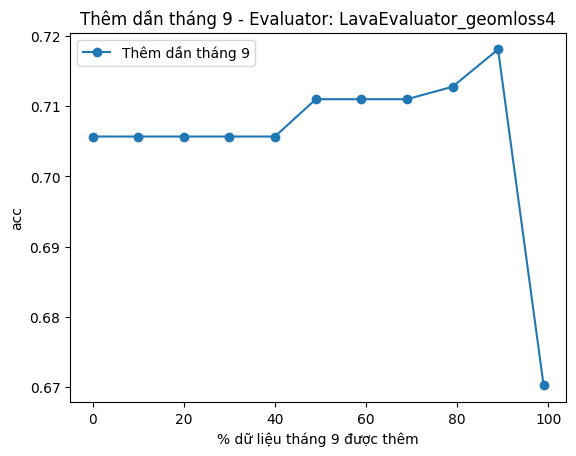


===== HOÀN THÀNH: CHẠY HẾT TẤT CẢ EVALUATOR CHO THỰC NGHIỆM 2 =====


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

# ========== Giả sử bạn đã định nghĩa/có sẵn ==========
#   KNNEvaluator, CKNNEvaluator, LavaEvaluator_batch, LavaEvaluator_batchl2l,
#   LavaEvaluator_OT, LavaEvaluator_geomloss, ExperimentRunner
#   LogisticRegression, run_experiments (nếu cần)
#   Và đã load:
#       X_jul_trn, y_jul_trn
#       X_jul_aug_trn, y_jul_aug_trn, X_jul_aug_val, y_jul_aug_val
#       X_jul_aug_sep_trn, y_jul_aug_sep_trn, X_jul_aug_sep_val, y_jul_aug_sep_val
#   num_jul = len(X_jul_trn), num_aug = len(X_jul_aug_trn) - num_jul, ...

# ---------------- PHẦN 0: Khởi tạo evaluator & chạy (7+8) ----------------
knn_evaluator1 = KNNEvaluator(Ismetric=0)
cknn_evaluator2 = CKNNEvaluator(T=200, default=False)
lava_evaluator_batchl2l = LavaEvaluator_batchl2l(batch=56)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()

experiment = ExperimentRunner(evaluators=[
    knn_evaluator1, 
    cknn_evaluator2, 
    lava_evaluator_batchl2l,
    lava_evaluator_OT, 
    lava_evaluator_geomloss
])

results_jul_aug = experiment.run(
    X_jul_aug_trn, 
    y_jul_aug_trn, 
    X_jul_aug_val, 
    y_jul_aug_val
)
# => results_jul_aug: dict {evaluator_name: shap_array (dài = num_jul + num_aug)}

num_jul = len(X_jul_trn)
num_aug = len(X_jul_aug_trn) - num_jul
num_sep = len(X_jul_aug_sep_trn) - (num_jul + num_aug)


# ---------------- PHẦN 1: Tách shap tháng 8 & chọn 25% tốt nhất cho MỖI evaluator ----------------
shap_vals_algo_lst = list(results_jul_aug.keys())
top_25_each_evaluator = {}

for algo in shap_vals_algo_lst:
    shap_7_8 = results_jul_aug[algo]       # shap/data values cho toàn bộ (7+8)
    shap_aug = shap_7_8[num_jul : num_jul + num_aug]  # Chỉ phần tháng 8

    # Sắp xếp giảm dần => shap cao -> tốt
    sorted_idx_desc = np.argsort(shap_aug)[::-1]

    top_25_count = int(num_aug * 0.25)
    idx_top_aug = sorted_idx_desc[:top_25_count]
    top_25_each_evaluator[algo] = idx_top_aug

    print(f"[{algo}] -> top25% tháng 8 = {top_25_count} điểm, index={idx_top_aug[:5]} ...")

print("\n----- Đã chọn 25% tháng 8 cho MỌI evaluator -----\n")


# ---------------- PHẦN 2: Định nghĩa hàm “thêm dần” tháng 9 ----------------
def data_experiment_add_month9(
    shap_vals_new,
    X_fixed, y_fixed,
    X_new, y_new,
    X_val, y_val,
    model, 
    metrics='acc',
    plot_every=0.05,
    add_high=True,
    algo_name=None
):
    """
    Thêm dần dữ liệu 'X_new' (tháng 9) vào 'X_fixed' (7 + top25%8),
    dựa theo shap_vals_new (của tháng 9).
    Vẽ biểu đồ & trả về (frac_list, score_list).
    """
    sorted_idx = np.argsort(shap_vals_new)
    if add_high:
        sorted_idx = sorted_idx[::-1]  # shap cao trước

    n_new = len(X_new)
    step = max(1, int(n_new*plot_every))
    frac_list, score_list = [], []

    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    for i in range(0, n_new+1, step):
        frac = round(i/n_new, 2)*100
        frac_list.append(frac)

        pick = sorted_idx[:i]
        X_tmp = np.concatenate([X_fixed, X_new[pick]], axis=0)
        y_tmp = np.concatenate([y_fixed, y_new[pick]], axis=0)

        X_tmp_t = torch.tensor(X_tmp, dtype=torch.float32)
        y_tmp_t = torch.tensor(y_tmp, dtype=torch.long)

        model_clone = model.clone()
        model_clone.fit(X_tmp_t, y_tmp_t, epochs=500, lr=0.1)

        preds = model_clone.predict(X_val_t)
        if metrics=='acc':
            score = accuracy_score(y_val_t, preds)
        else:
            score = roc_auc_score(y_val_t, preds)
        score_list.append(score)

    # Plot
    plt.figure()
    if algo_name:
        plt.title(f"Thêm dần tháng 9 - Evaluator: {algo_name}")
    plt.plot(frac_list, score_list, marker='o', label='Thêm dần tháng 9')
    plt.xlabel('% dữ liệu tháng 9 được thêm')
    plt.ylabel(metrics)
    plt.legend()
    plt.show()

    return frac_list, score_list


# ---------------- PHẦN 3: Vòng FOR qua TẤT CẢ evaluator => thực nghiệm 2 ----------------
# Mục tiêu: 
#   - Mỗi evaluator => (7 + top25%8) => ghép +9 => tách shap 9 => thêm dần
#   - Lưu/trình bày kết quả

from machine_learning_model import LogisticRegression

results_experiment2 = {}  # Lưu kết quả cho từng evaluator

for algo in shap_vals_algo_lst:
    print(f"\n=== THỰC NGHIỆM 2 - EVALUATOR = {algo} ===")

    # 3.1) Tạo (7 + top25%8) theo evaluator `algo`
    idx_top_aug_algo = top_25_each_evaluator[algo]

    X_aug_only = X_jul_aug_trn[num_jul:]
    y_aug_only = y_jul_aug_trn[num_jul:]

    X_jul_aug25_trn = np.concatenate([X_jul_trn, X_aug_only[idx_top_aug_algo]], axis=0)
    y_jul_aug25_trn = np.concatenate([y_jul_trn, y_aug_only[idx_top_aug_algo]], axis=0)

    print(f"-> (7 + 25%8) size = {X_jul_aug25_trn.shape}")

    # 3.2) Tạo index (7 + 25%8 + 9) trong X_jul_aug_sep_trn
    idx_jul = np.arange(0, num_jul)
    idx_aug_top25 = num_jul + idx_top_aug_algo  # offset
    idx_sep = np.arange(num_jul + num_aug, num_jul + num_aug + num_sep)
    keep_idx = np.concatenate([idx_jul, idx_aug_top25, idx_sep])

    X_jul_aug25_sep_trn = X_jul_aug_sep_trn[keep_idx]
    y_jul_aug25_sep_trn = y_jul_aug_sep_trn[keep_idx]

    # 3.3) Chạy evaluator (lại) trên (7 + 25%8 + 9) => tách shap tháng 9
    results_jul_aug25_sep = experiment.run(
        X_jul_aug25_sep_trn,
        y_jul_aug25_sep_trn,
        X_jul_aug_sep_val,
        y_jul_aug_sep_val
    )
    # Lấy shap của evaluator `algo`
    shap_7_aug25_9 = results_jul_aug25_sep[algo]

    # Tách shap tháng 9
    pos_sep_start = len(idx_jul) + len(idx_top_aug_algo)
    pos_sep_end   = pos_sep_start + len(idx_sep)

    shap_sep = shap_7_aug25_9[pos_sep_start : pos_sep_end]
    X_sep = X_jul_aug25_sep_trn[pos_sep_start : pos_sep_end]
    y_sep = y_jul_aug25_sep_trn[pos_sep_start : pos_sep_end]

    # Phần cố định (7 + 25%8)
    X_fixed = X_jul_aug25_sep_trn[:pos_sep_start]
    y_fixed = y_jul_aug25_sep_trn[:pos_sep_start]

    print(f"-> Tháng 9 size={X_sep.shape}, shap_sep={shap_sep.shape}")

    # 3.4) Thêm dần tháng 9
    model = LogisticRegression(
        input_dim=X_fixed.shape[1],
        num_classes=len(np.unique(y_fixed))
    )

    frac_list, score_list = data_experiment_add_month9(
        shap_vals_new=shap_sep,
        X_fixed=X_fixed, y_fixed=y_fixed,
        X_new=X_sep, y_new=y_sep,
        X_val=X_jul_aug_sep_val, y_val=y_jul_aug_sep_val,
        model=model,
        metrics='acc',
        plot_every=0.1,
        add_high=True,
        algo_name=algo
    )

    # Lưu kết quả
    results_experiment2[algo] = (frac_list, score_list)

print("\n===== HOÀN THÀNH: CHẠY HẾT TẤT CẢ EVALUATOR CHO THỰC NGHIỆM 2 =====")


In [7]:
def data_experiment_add_data(
    shap_vals_new, 
    X_fixed, y_fixed, 
    X_new, y_new, 
    X_val, y_val, 
    model, 
    metrics='acc', 
    plot_every_percentage=0.05,
    add_high=True
):
    """
    Thêm dần dữ liệu 'X_new' (tháng 9 chẳng hạn) vào 'X_fixed' (tháng 7 + 25% tháng 8),
    dựa theo shap_vals_new. 
    Đánh giá trên (X_val, y_val).
    """
    sorted_idx = np.argsort(shap_vals_new)
    if add_high:
        sorted_idx = sorted_idx[::-1]  # sắp xếp giảm dần => shap cao trước

    num_new = len(X_new)
    step = max(1, round(num_new*plot_every_percentage))
    steps = range(0, num_new+1, step)

    frac_lst = []
    scores_lst = []

    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    for i in steps:
        frac = round(i/num_new, 2)*100
        frac_lst.append(frac)

        selected = sorted_idx[:i]   # thêm i điểm đầu
        X_tmp = np.concatenate((X_fixed, X_new[selected]), axis=0)
        y_tmp = np.concatenate((y_fixed, y_new[selected]), axis=0)

        X_tmp_t = torch.tensor(X_tmp, dtype=torch.float32)
        y_tmp_t = torch.tensor(y_tmp, dtype=torch.long)

        model_clone = model.clone()
        model_clone.fit(X_tmp_t, y_tmp_t, epochs=1000, lr=0.1)

        preds = model_clone.predict(X_val_t)
        if metrics == 'acc':
            score = accuracy_score(y_val_t, preds)
        else:
            score = roc_auc_score(y_val_t, preds)
        scores_lst.append(score)

    plt.plot(frac_lst, scores_lst, marker='o', label='Thêm dần dữ liệu mới')
    plt.xlabel('% dữ liệu mới được thêm')
    plt.ylabel(metrics)
    plt.legend()
    plt.show()

    return frac_lst, scores_lst

In [8]:
def main_experiment_flow(
    X_jul_trn, y_jul_trn,
    X_jul_aug_trn, y_jul_aug_trn,
    X_jul_aug_val, y_jul_aug_val,
    X_jul_aug_sep_trn, y_jul_aug_sep_trn,
    X_jul_aug_sep_val, y_jul_aug_sep_val,
    experiment,  # ExperimentRunner chứa các evaluator
    model_class, # class LogisticRegression hoặc tương tự
    metrics='acc',
    top_percent=0.25
):

    # ========== 1) LẤY SHAP CHO THÁNG 7+8 ==========
    results_jul_aug = experiment.run(
        X_jul_aug_trn, 
        y_jul_aug_trn, 
        X_jul_aug_val, 
        y_jul_aug_val
    )
    # Giả sử results_jul_aug là dict: {'knn': [...], 'lava_batch': [...], ...}

    # Tách số mẫu
    num_jul = len(X_jul_trn)
    num_aug = len(X_jul_aug_trn) - num_jul

    # ========== 2) CHỌN 25% (hoặc top_percent) DỮ LIỆU THÁNG 8 ==========
    #  -- ví dụ dựa trên "lava_batch" --
    shap_all_7_8 = results_jul_aug['lava_batch']  # hoặc evaluator khác
    shap_aug = shap_all_7_8[num_jul : num_jul + num_aug]  # shap của riêng tháng 8

    sorted_idx_aug_desc = np.argsort(shap_aug)[::-1]
    top_k_aug = int(num_aug * top_percent)
    idx_top_aug = sorted_idx_aug_desc[:top_k_aug]

    X_aug_only = X_jul_aug_trn[num_jul:]  # Chỉ phần tháng 8
    y_aug_only = y_jul_aug_trn[num_jul:]

    X_jul_aug25_trn = np.concatenate((X_jul_trn, X_aug_only[idx_top_aug]), axis=0)
    y_jul_aug25_trn = np.concatenate((y_jul_trn, y_aug_only[idx_top_aug]), axis=0)

    print(f"Đã chọn {top_k_aug} điểm (={top_percent*100}%) tháng 8 có shap cao nhất để ghép với tháng 7.")

    # ========== 3) GHÉP VỚI THÁNG 9 & LẤY SHAP ==========
    # Ta có sẵn 7+8+9 => X_jul_aug_sep_trn, y_jul_aug_sep_trn
    # Nhưng muốn "loại" bớt 75% tháng 8 => ta chỉ giữ (7 + top25%8) + 9
    # Tạo index
    idx_jul = np.arange(0, num_jul)
    idx_aug_top = np.arange(num_jul, num_jul+num_aug)[idx_top_aug]
    num_sep = len(X_jul_aug_sep_trn) - (num_jul + num_aug)
    idx_sep = np.arange(num_jul+num_aug, num_jul+num_aug+num_sep)

    # Gom index
    keep_idx = np.concatenate([idx_jul, idx_aug_top, idx_sep])
    X_train_7_aug25_9 = X_jul_aug_sep_trn[keep_idx]
    y_train_7_aug25_9 = y_jul_aug_sep_trn[keep_idx]

    # Chạy evaluator để lấy shap cho "7 + top25%8 + 9"
    results_jul_aug25_sep = experiment.run(
        X_train_7_aug25_9, 
        y_train_7_aug25_9,
        X_jul_aug_sep_val, 
        y_jul_aug_sep_val
    )

    # ========== 4) TÁCH SHAP THÁNG 9 & THÊM DẦN ==========
    # Tháng 9 nằm ở đoạn cuối
    pos_sep_start = len(idx_jul) + len(idx_aug_top)
    pos_sep_end = pos_sep_start + len(idx_sep)

    shap_vals_sep = results_jul_aug25_sep['lava_batch'][pos_sep_start : pos_sep_end]

    # Tương ứng dữ liệu tháng 9
    X_fixed = X_train_7_aug25_9[:pos_sep_start]  # (7 + 25%8)
    y_fixed = y_train_7_aug25_9[:pos_sep_start]
    X_sep = X_train_7_aug25_9[pos_sep_start : pos_sep_end]
    y_sep = y_train_7_aug25_9[pos_sep_start : pos_sep_end]

    # Model
    model = model_class(
        input_dim=X_fixed.shape[1], 
        num_classes=len(np.unique(y_fixed))
    )

    print(f"\n----- BẮT ĐẦU 'THÊM DẦN THÁNG 9' -----")
    data_experiment_add_data(
        shap_vals_new=shap_vals_sep,
        X_fixed=X_fixed,
        y_fixed=y_fixed,
        X_new=X_sep,
        y_new=y_sep,
        X_val=X_jul_aug_sep_val,
        y_val=y_jul_aug_sep_val,
        model=model,
        metrics=metrics,
        plot_every_percentage=0.05,  # tuỳ
        add_high=True               # thêm từ shap cao
    )

    print("Hoàn thành thực nghiệm hai: (7 + top25%8) -> thêm dần tháng 9.\n")

In [9]:
main_experiment_flow(
        X_jul_trn, y_jul_trn,
        X_jul_aug_trn, y_jul_aug_trn,
        X_jul_aug_val, y_jul_aug_val,
        X_jul_aug_sep_trn, y_jul_aug_sep_trn,
        X_jul_aug_sep_val, y_jul_aug_sep_val,
        experiment,            # ví dụ: experiment = ExperimentRunner([...])
        model_class=LogisticRegression,  # hoặc class model bạn dùng
        metrics='acc', 
        top_percent=0.25       # 25% dữ liệu tháng 8
    )

Running evaluator: KNNEvaluator0


100%|██████████| 977/977 [00:00<00:00, 4090.15it/s]


KNNEvaluator0 completed in 0.49 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 778/778 [00:00<00:00, 4508.21it/s]


CKNNEvaluator1 completed in 0.29 seconds.
Running evaluator: LavaEvaluator_batch2


batch LAVA:   0%|          | 0/18 [00:00<?, ?it/s]





d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(










































batch LAVA:   6%|▌         | 1/18 [00:00<00:13,  1.30it/s]















































batch LAVA:  11%|█         | 2/18 [00:01<00:11,  1.43it/s]















































batch LAVA:  17%|█▋        | 3/18 [00:02<00:10,  1.37it/s]















































batch LAVA:  22%|██▏       | 4/18 [00:02<00:10,  1.37it/s]















































batch LAVA:  28%|██▊       | 5/18 [00:03<00:09,  1.30it/s]















































batch LAVA:  33%|███▎      | 6/18 [00:04<00:09,  1.29it/s]















































batch LAVA:  39%|███▉      | 7/18 [00

LavaEvaluator_batch2 completed in 15.07 seconds.
Running evaluator: LavaEvaluator_batchl2l3


batch LAVA: 100%|██████████| 18/18 [00:09<00:00,  1.83it/s]


LavaEvaluator_batchl2l3 completed in 10.12 seconds.
Running evaluator: LavaEvaluator_OT4


LavaEvaluator_OT4 completed in 0.49 seconds.
Running evaluator: LavaEvaluator_geomloss5


LavaEvaluator_geomloss5 completed in 0.09 seconds.


KeyError: 'lava_batch'